Implementing a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms:

The data on the hand is available at [https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data]
The data points of interests are -
LotShape: General shape of property
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
Bedroom: Number of bedrooms above basement level
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms


In [ ]:
# Importing Packages
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Loading training data
train_df = pd.read_csv("C:/Users/HP/Downloads/train.csv")

# Loading test data
test_df = pd.read_csv("C:/Users/HP/Downloads/test.csv")

# Selecting relevant columns from train data
selected_columns_train = ['LotArea','1stFlrSF','2ndFlrSF','BedroomAbvGr','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','SalePrice']

#Selecting relevant columns from prediction data
selected_columns_test = ['LotArea','1stFlrSF','2ndFlrSF','BedroomAbvGr','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']

# Training Data
train_data = train_df[selected_columns_train]
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

# Prediction Data set provided as in Kaggle
X_test= test_df[selected_columns_test]


   LotArea  1stFlrSF  2ndFlrSF  BedroomAbvGr  FullBath  HalfBath  \
0     8450       856       854             3         2         1   
1     9600      1262         0             3         2         0   
2    11250       920       866             3         2         1   
3     9550       961       756             3         1         0   
4    14260      1145      1053             4         2         1   

   BsmtFullBath  BsmtHalfBath  SalePrice  
0             1             0     208500  
1             0             1     181500  
2             1             0     223500  
3             1             0     140000  
4             1             0     250000  
LotArea         0
1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
FullBath        0
HalfBath        0
BsmtFullBath    0
BsmtHalfBath    0
SalePrice       0
dtype: int64
             LotArea     1stFlrSF     2ndFlrSF  BedroomAbvGr     FullBath  \
count    1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean

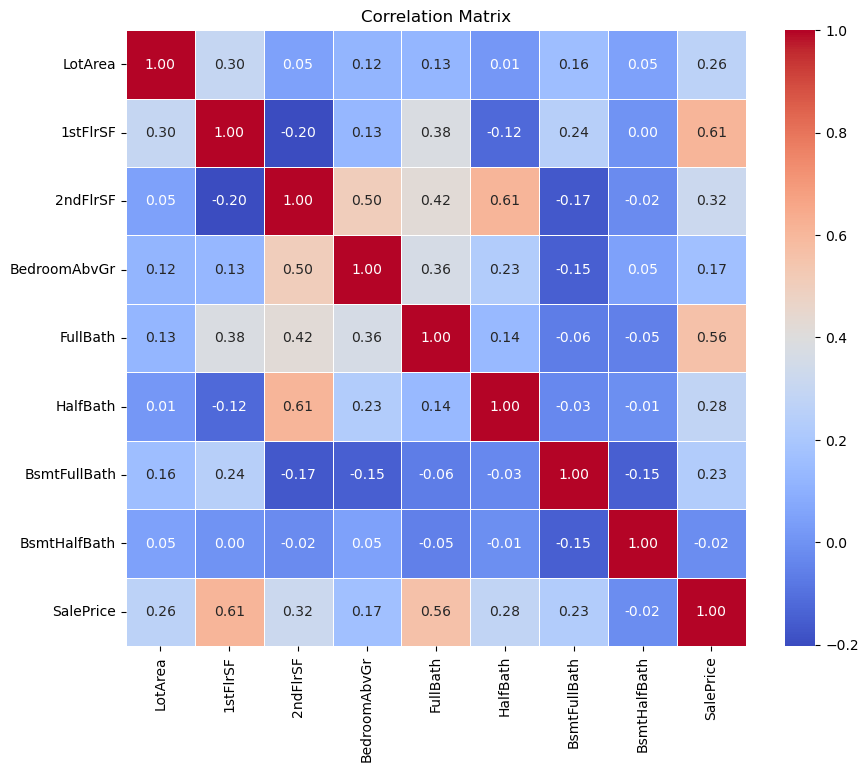

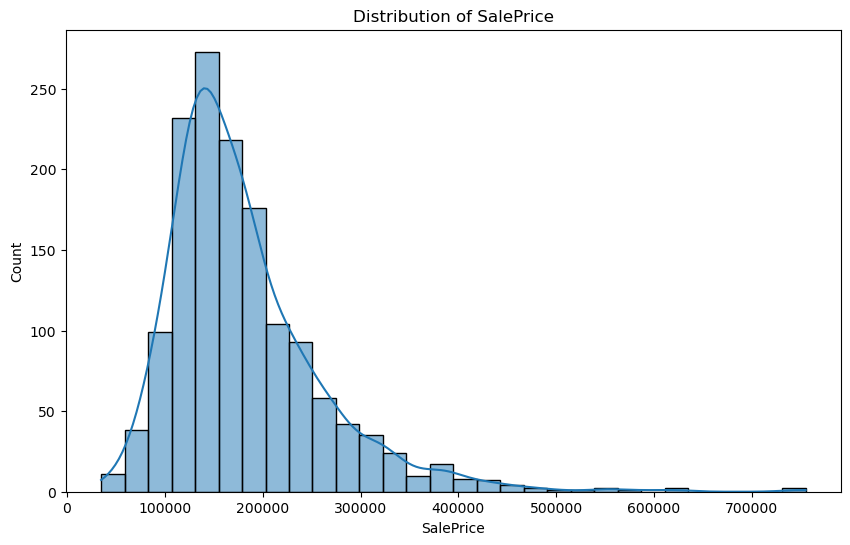

In [31]:

# Displaying the first few rows of the dataset
print(train_data.head())

# Check for missing values
print(train_data.isnull().sum())

# Dropping Missing Values
train_data=train_data.dropna()
X_test = test_df[selected_columns_test].dropna()

# Summary statistics
print(train_data.describe())

# Correlation matrix
correlation_matrix = train_data.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], bins=30, kde=True)
plt.title('Distribution of SalePrice')
plt.show()


So it can be seen that the Sales Price has only moderate positive correlation with Lot size and number of full baths and minimal to no correlation with the other variables. So, linear regression may not show optimistic results.

In [34]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make prediction on the training data
predictions_train = model.predict(X_train)

# Make predictions on the prediction set
predictions_test = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_train, predictions_train)
rmse = np.sqrt(mse)
r_squared = r2_score(y_train, predictions_train)

# Display adjusted R-squared
a_r_squared = 1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-square: {r_squared}')
print(f'Adjusted R-square: {a_r_squared}')

Root Mean Squared Error (RMSE): 46532.533267493964
R-squared: 0.65667524398703
Adjusted R-squared: 0.6547823438849598


As it can be realized that adjusted R square is only 65.5 percent which shows a fair predictability but it can be optimized more by using step wise regression.